In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('./stackedData.csv')

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6
0,0,1.411106e+09,14.030000,26.430000,0.040000,0.291998,0.203007,0.504994
1,1,1.411193e+09,20.650000,11.740000,0.060000,0.240622,0.187842,0.571536
2,2,1.411279e+09,25.170000,20.060000,0.020000,0.234388,0.215615,0.549997
3,3,1.411366e+09,18.960000,21.740000,0.040000,0.249943,0.189135,0.560922
4,4,1.411452e+09,17.540000,14.310000,0.030000,0.267956,0.183428,0.548616
...,...,...,...,...,...,...,...,...
1591,1591,1.577603e+09,21.607843,1.039216,0.088235,0.134618,0.154275,0.711107
1592,1592,1.577689e+09,18.435644,1.514851,0.079208,0.160088,0.150567,0.689344
1593,1593,1.577776e+09,19.676471,1.000000,0.049020,0.160406,0.153584,0.686010
1594,1594,1.577862e+09,26.435644,1.019802,0.118812,0.144615,0.129530,0.725856


In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6
0,0,1.411106e+09,14.030000,26.430000,0.040000,0.291998,0.203007,0.504994
1,1,1.411193e+09,20.650000,11.740000,0.060000,0.240622,0.187842,0.571536
2,2,1.411279e+09,25.170000,20.060000,0.020000,0.234388,0.215615,0.549997
3,3,1.411366e+09,18.960000,21.740000,0.040000,0.249943,0.189135,0.560922
4,4,1.411452e+09,17.540000,14.310000,0.030000,0.267956,0.183428,0.548616
...,...,...,...,...,...,...,...,...
1591,1591,1.577603e+09,21.607843,1.039216,0.088235,0.134618,0.154275,0.711107
1592,1592,1.577689e+09,18.435644,1.514851,0.079208,0.160088,0.150567,0.689344
1593,1593,1.577776e+09,19.676471,1.000000,0.049020,0.160406,0.153584,0.686010
1594,1594,1.577862e+09,26.435644,1.019802,0.118812,0.144615,0.129530,0.725856


In [ ]:
df = pd.read_csv('./stackedData.csv')
df = df.drop(['Unnamed: 0', '0'], axis=1)

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 12.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=3521e5835ece29b52b1fd2e01bd5d0988393093c8d3ad797dc7c0f497ac1bf8f
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import pandas as pd
from pandas_datareader import data as pdr

import yfinance as yf

yf.pdr_override()

def getBTCData(dateSpans):
  BTC_data = []
  for date in dateSpans:
    start_date = date[0]
    end_date = date[1]

    smolData = pdr.get_data_yahoo("BTC-USD", start=start_date, end=end_date)

    BTC_data.append(smolData)
  
  return pd.concat(BTC_data, axis=0)



In [ ]:
BTC_data = getBTCData([('2014-09-19', '2016-01-02'), ('2016-02-02', '2016-08-02'), ('2016-09-02', '2016-12-02'), ('2017-02-02', '2017-02-26'), ('2017-05-02', '2017-07-02'), ('2017-08-02', '2017-09-02'), ('2018-01-02', '2020-01-02')])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
BTC_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
...,...,...,...,...,...,...
2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,22445257702
2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,22874131672
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112


Creating lookahead dataset

In [ ]:
data_copy = df[:]
data_copy['BTC_OPEN'] = BTC_data['Open'].values
data_copy['BTC_HIGH'] = BTC_data['High'].values
data_copy['BTC_LOW'] = BTC_data['Low'].values
data_copy['BTC_VOLUME'] = BTC_data['Volume'].values


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
lookAhead = 10
LookAhead_y = BTC_data['Close'][lookAhead:]
LookAhead_x = data_copy[:-lookAhead]

In [ ]:
LookAhead_x

,1,2,3,4,5,6,BTC_OPEN,BTC_HIGH,BTC_LOW,BTC_VOLUME
0,14.030000,26.430000,0.040000,0.291998,0.203007,0.504994,424.102997,427.834991,384.532013,37919700
1,20.650000,11.740000,0.060000,0.240622,0.187842,0.571536,394.673004,423.295990,389.882996,36863600
2,25.170000,20.060000,0.020000,0.234388,0.215615,0.549997,408.084991,412.425995,393.181000,26580100
3,18.960000,21.740000,0.040000,0.249943,0.189135,0.560922,399.100006,406.915985,397.130005,24127600
4,17.540000,14.310000,0.030000,0.267956,0.183428,0.548616,402.092010,441.557007,396.196991,45099500
...,...,...,...,...,...,...,...,...,...,...
1590,25.366337,1.019802,0.049505,0.150011,0.180948,0.669041,7289.031250,7399.041016,7286.905273,21365673026
1591,21.607843,1.039216,0.088235,0.134618,0.154275,0.711107,7317.647461,7513.948242,7279.865234,22445257702
1592,18.435644,1.514851,0.079208,0.160088,0.150567,0.689344,7420.272949,7454.824219,7276.308105,22874131672
1593,19.676471,1.000000,0.049020,0.160406,0.153584,0.686010,7294.438965,7335.290039,7169.777832,21167946112


In [ ]:
scaler = MinMaxScaler()

In [ ]:
scale_data = scaler.fit_transform(LookAhead_x, LookAhead_y)

In [ ]:
s_train_x, s_valid_x, s_train_y, s_valid_y = train_test_split(scale_data, LookAhead_y, test_size = 0.3)

In [ ]:
n_train_x, n_valid_x, n_train_y, n_valid_y = train_test_split(LookAhead_x, LookAhead_y, test_size = 0.3)

#Tuning Normal Regression Models

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.metrics import r2_score

#Optimize 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search = GridSearchCV(rid, param_grid=ridge_tuned_params, scoring=['r2'],refit='r2')

In [ ]:
search.fit(s_train_x, s_train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
         0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
         0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
         1.2012012 ,   1.3013...
        97.2972973 ,  97.3973974 ,  97.4974975 ,  97.5975976 ,
        97.6976977 ,  97.7977978 ,  97.8978979 ,  97.997998  ,
        98.0980981 ,  98.1981982 ,  98.2982983 ,  98.3983984 ,
        98.4984985 ,  98.5985986 ,  98.6986987 ,  98.7987988 ,
        98.8988989 ,  98.998999  ,  99.0990991 ,  99.1991992 ,
        99.2992993 ,  99.3993994 ,  99.4994995 ,  99.5995996 ,
        99.6996997 ,  99.7997998 ,  99.8998999 , 100.        ])}],
        

In [ ]:
search.best_estimator_

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
s_valid_x.shape

(319, 10)

In [ ]:
x_pred = rid.predict(s_valid_x)

0.9792046394668421


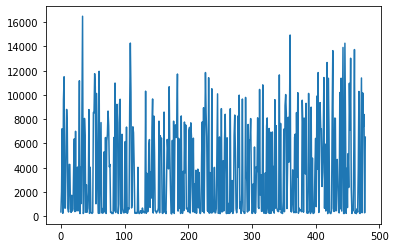

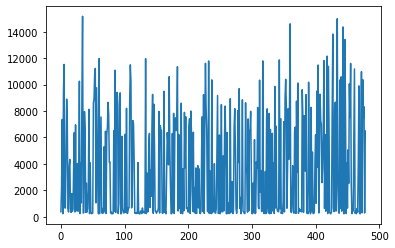

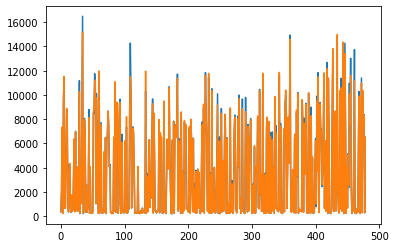

In [ ]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt

reg = linear_model.LinearRegression().fit(s_train_x,s_train_y)
x_pred = reg.predict(s_valid_x)
print(reg.score(s_valid_x,s_valid_y))
plt.plot(range(len(s_valid_y)),x_pred)
plt.figure()
plt.plot(range(len(s_valid_y)),s_valid_y)
plt.figure()
plt.plot(range(len(s_valid_y)),x_pred)
plt.plot(range(len(s_valid_y)),s_valid_y)



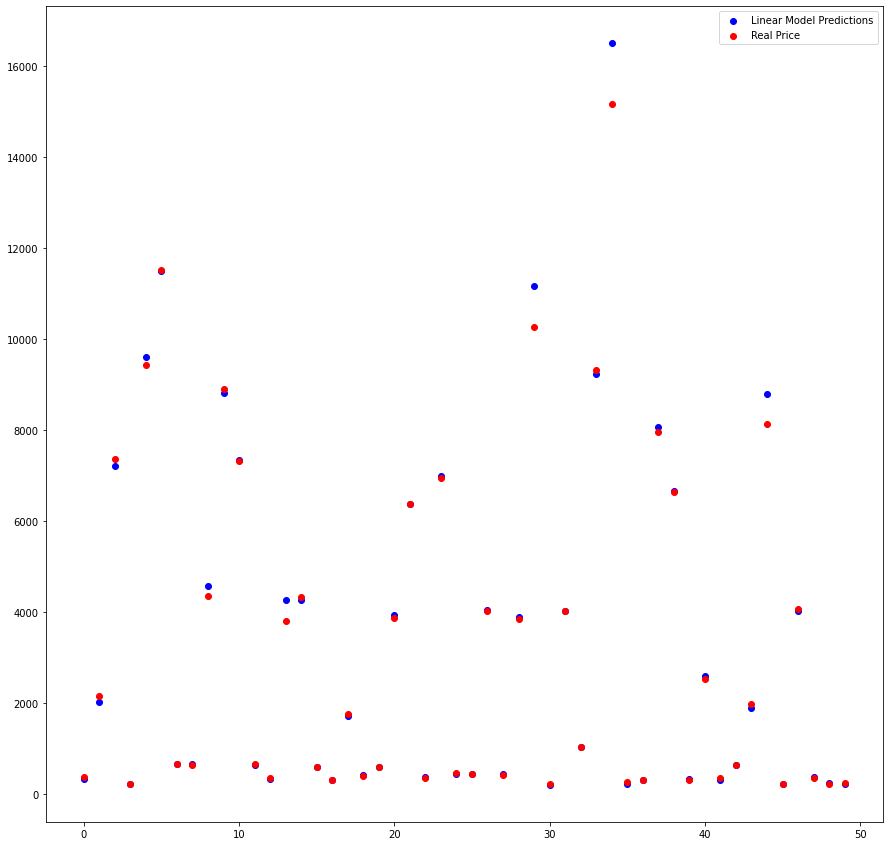

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(s_valid_y[:50])), x_pred[:50], c='b', label="Linear Model Predictions")
ax1.scatter(range(len(s_valid_y[:50])), s_valid_y[:50], c='r', label="Real Price")
plt.legend(loc='upper right')

#coeffs of model with lookahead=1


In [ ]:
features = ['Number of Words','Score','BTC Counter','Positive Sentiment','Negative_Sentiment','Neutral_Sentiment',"BTC_OPEN", "BTC_HIGH", "BTC_LOW", "BTC_VOLUME"]

In [ ]:
coeffs = reg.coef_

In [ ]:
for idx in range(len(coeffs)):
  print(f'{features[idx]} has a weight of : {coeffs[idx]}')

Number of Words has a weight of : -1189.1048573702558
Score has a weight of : 621.2882615778944
BTC Counter has a weight of : 309.4009535572185
Positive Sentiment has a weight of : -102.76969315518852
Negative_Sentiment has a weight of : -351.15801374067837
Neutral_Sentiment has a weight of : 2816.4283759298187
BTC_OPEN has a weight of : -8357.794620996938
BTC_HIGH has a weight of : 14203.854266976681
BTC_LOW has a weight of : 10813.507744563953
BTC_VOLUME has a weight of : 151.25867190860333


coeffs of model with lookahead=10

In [ ]:
coeffs = reg.coef_

In [ ]:
for idx in range(len(coeffs)):
  print(f'{features[idx]} has a weight of : {coeffs[idx]}')

Number of Words has a weight of : 1879.4775882129666
Score has a weight of : 543.1471190753136
BTC Counter has a weight of : -1057.5146894055001
Positive Sentiment has a weight of : -1081.1724719342078
Negative_Sentiment has a weight of : 2200.9446405389854
Neutral_Sentiment has a weight of : 10096.212652557477
BTC_OPEN has a weight of : -9294.748655611666
BTC_HIGH has a weight of : 6748.666463447042
BTC_LOW has a weight of : 17252.718046654838
BTC_VOLUME has a weight of : 1626.0173918537323


Ridge Regression

In [ ]:
ridge_tuned_params = [{'alpha': np.linspace(0, 100, 1000)}]

In [ ]:
s_train_x

array([[4.10564922e-02, 7.38341531e-02, 8.16326531e-02, ...,
        1.11338602e-03, 3.33572634e-03, 3.25070709e-04],
       [8.64538178e-02, 7.15574307e-02, 1.22448980e-01, ...,
        9.77076971e-03, 1.06174933e-02, 1.72343341e-03],
       [8.23540593e-02, 4.22740704e-02, 1.22448980e-01, ...,
        1.20889654e-02, 1.31604786e-02, 6.86234024e-04],
       ...,
       [1.00652981e-01, 7.86231209e-02, 1.42857143e-01, ...,
        2.02106527e-03, 4.08537548e-03, 3.98274994e-04],
       [1.49600098e-01, 2.95950820e-02, 3.67346939e-01, ...,
        2.37613704e-01, 2.31656069e-01, 6.50955059e-02],
       [6.56550431e-02, 8.29802965e-02, 1.02040816e-01, ...,
        2.82960028e-02, 3.09799444e-02, 2.08411317e-03]])

In [ ]:
sorted(search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_r2',
 'param_alpha',
 'params',
 'rank_test_r2',
 'split0_test_r2',
 'split1_test_r2',
 'split2_test_r2',
 'split3_test_r2',
 'split4_test_r2',
 'std_fit_time',
 'std_score_time',
 'std_test_r2']

In [ ]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(ascending=False,by=['mean_test_r2'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_r2', 'std_fit_time', 'std_test_r2']
]

,params,rank_test_r2,std_fit_time,std_test_r2
kernel,,,,
0.0,{'alpha': 0.0},1,0.003277,0.001734
0.1001001001001001,{'alpha': 0.1001001001001001},2,0.000017,0.001668
0.2002002002002002,{'alpha': 0.2002002002002002},3,0.000063,0.001654
0.3003003003003003,{'alpha': 0.3003003003003003},4,0.000086,0.001635
0.4004004004004004,{'alpha': 0.4004004004004004},5,0.000048,0.001614
...,...,...,...,...
99.5995995995996,{'alpha': 99.5995995995996},996,0.000088,0.003602
99.6996996996997,{'alpha': 99.6996996996997},997,0.001199,0.003603
99.7997997997998,{'alpha': 99.7997997997998},998,0.000297,0.003603


0.9810381750577002


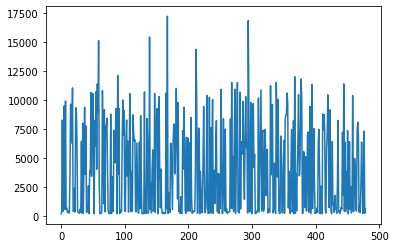

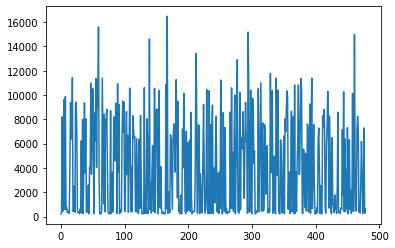

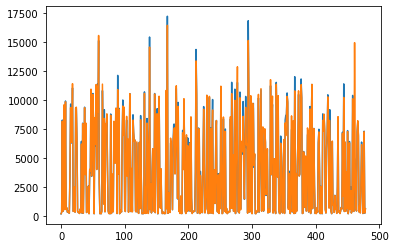

In [ ]:
rid = linear_model.Ridge(alpha=0.1001001)
rid.fit(s_train_x,s_train_y)
x_pred = rid.predict(s_valid_x)
print(rid.score(s_valid_x,s_valid_y))
plt.plot(range(len(s_valid_y)),x_pred)
plt.figure()
plt.plot(range(len(s_valid_y)),s_valid_y)
plt.figure()
plt.plot(range(len(s_valid_y)),x_pred)
plt.plot(range(len(s_valid_y)),s_valid_y)

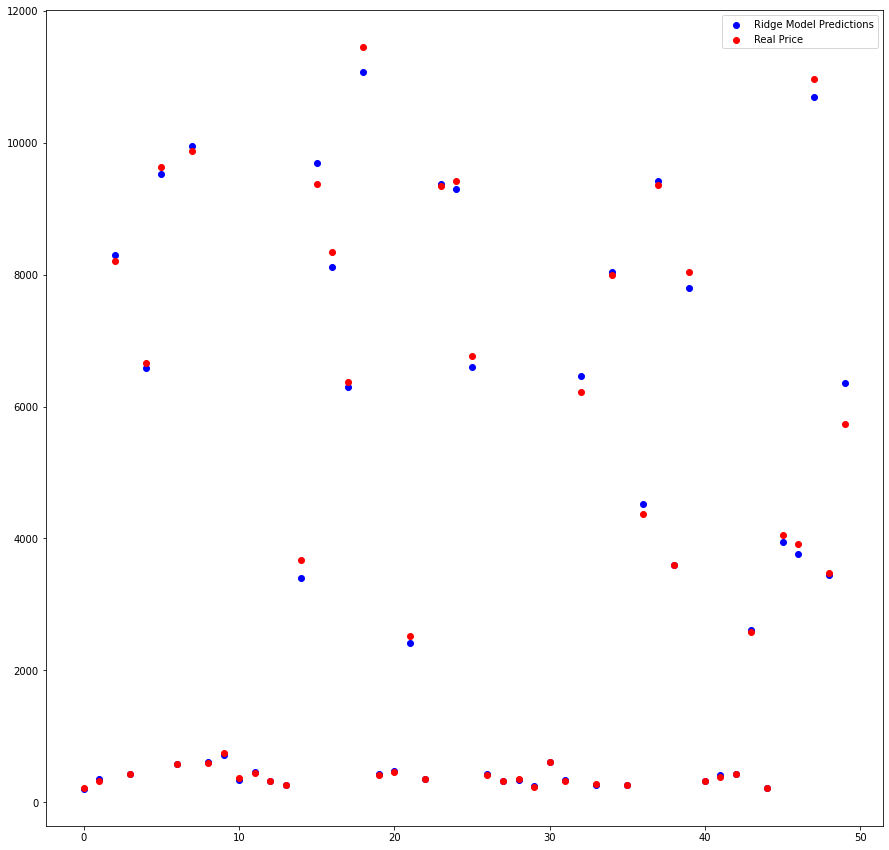

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(s_valid_y[:50])), x_pred[:50], c='b', label="Ridge Model Predictions")
ax1.scatter(range(len(s_valid_y[:50])), s_valid_y[:50], c='r', label="Real Price")
plt.legend(loc='upper right')

#Tuned Lasso Regression

0.9804830293076146


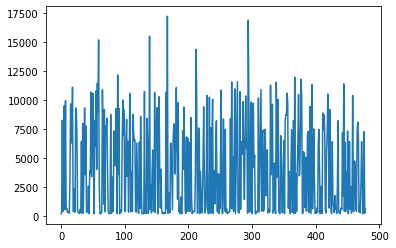

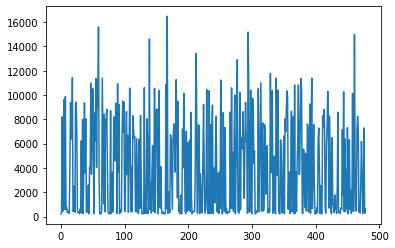

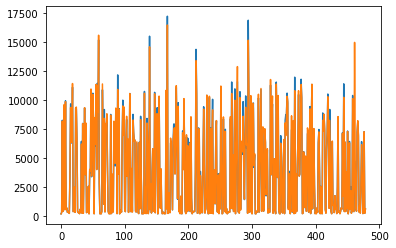

In [ ]:
lasso = linear_model.Lasso(alpha=0.8)
lasso.fit(s_train_x,s_train_y)
x_pred = lasso.predict(s_valid_x)
print(lasso.score(s_valid_x,s_valid_y))
plt.plot(range(len(s_valid_y)),x_pred)
plt.figure()
plt.plot(range(len(s_valid_y)),s_valid_y)
plt.figure()
plt.plot(range(len(s_valid_y)),x_pred)
plt.plot(range(len(s_valid_y)),s_valid_y)

In [ ]:
lasso_tuned_params = [{'alpha': np.linspace(0, 100, 1000)}]

In [ ]:
lasso_search = GridSearchCV(lasso, param_grid=ridge_tuned_params, scoring=['r2'],refit='r2')

In [ ]:
lasso_search.fit(s_train_x, s_train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31888336.128386736, tolerance: 1297768.0349628124
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=0.8, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
         0.4004004 ,   0.5005005 ,   0.6006006 ,   0.700700...
        97.2972973 ,  97.3973974 ,  97.4974975 ,  97.5975976 ,
        97.6976977 ,  97.7977978 ,  97.8978979 ,  97.997998  ,
        98.0980981 ,  98.1981982 ,  98.2982983 ,  98.3983984 ,
        98.4984985 ,  98.5985986 ,  98.6986987 ,  98.7987988 ,
        98.8988989 ,  98.998999  ,  99.0990991 ,  99.1991992 ,
        99.2992993 ,  99.3993994 ,  99.4994995 ,  99.5995996 ,
        99.6996997 ,  99.7997998 ,  99.8998999 , 100.        ])}],
             pr

In [ ]:
sorted(lasso_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_r2',
 'param_alpha',
 'params',
 'rank_test_r2',
 'split0_test_r2',
 'split1_test_r2',
 'split2_test_r2',
 'split3_test_r2',
 'split4_test_r2',
 'std_fit_time',
 'std_score_time',
 'std_test_r2']

In [ ]:
results_df = pd.DataFrame(lasso_search.cv_results_)
results_df = results_df.sort_values(ascending=False,by=['mean_test_r2'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_r2', 'std_fit_time', 'std_test_r2']
]

,params,rank_test_r2,std_fit_time,std_test_r2
kernel,,,,
2.1021021021021022,{'alpha': 2.1021021021021022},1,0.000183,0.001607
2.2022022022022023,{'alpha': 2.2022022022022023},2,0.000265,0.001606
2.002002002002002,{'alpha': 2.002002002002002},3,0.000598,0.001608
2.3023023023023024,{'alpha': 2.3023023023023024},4,0.000438,0.001605
1.9019019019019021,{'alpha': 1.9019019019019021},5,0.000601,0.001609
...,...,...,...,...
99.5995995995996,{'alpha': 99.5995995995996},996,0.000188,0.001040
99.6996996996997,{'alpha': 99.6996996996997},997,0.000198,0.001041
99.7997997997998,{'alpha': 99.7997997997998},998,0.000176,0.001041


In [ ]:
sorted(lasso_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_r2',
 'param_alpha',
 'params',
 'rank_test_r2',
 'split0_test_r2',
 'split1_test_r2',
 'split2_test_r2',
 'split3_test_r2',
 'split4_test_r2',
 'std_fit_time',
 'std_score_time',
 'std_test_r2']

In [ ]:
lasso_search.cv_results_['param_alpha']

masked_array(data=[0.0, 0.1001001001001001, 0.2002002002002002,
                   0.3003003003003003, 0.4004004004004004,
                   0.5005005005005005, 0.6006006006006006,
                   0.7007007007007008, 0.8008008008008008,
                   0.9009009009009009, 1.001001001001001,
                   1.1011011011011012, 1.2012012012012012,
                   1.3013013013013013, 1.4014014014014016,
                   1.5015015015015016, 1.6016016016016017,
                   1.7017017017017018, 1.8018018018018018,
                   1.9019019019019021, 2.002002002002002,
                   2.1021021021021022, 2.2022022022022023,
                   2.3023023023023024, 2.4024024024024024,
                   2.5025025025025025, 2.6026026026026026,
                   2.702702702702703, 2.802802802802803,
                   2.902902902902903, 3.0030030030030033,
                   3.1031031031031033, 3.2032032032032034,
                   3.3033033033033035, 3.403403403403403

0.9804051783639447


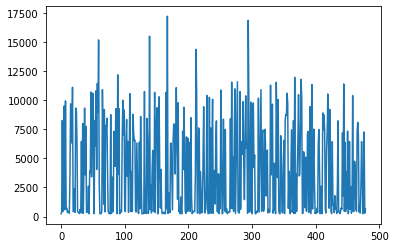

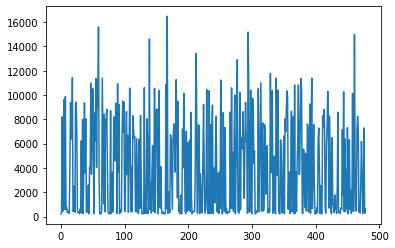

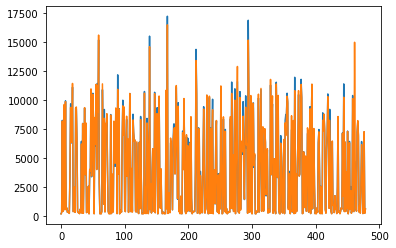

In [ ]:
lasso = linear_model.Lasso(alpha=2.102102102102102167)
lasso.fit(s_train_x,s_train_y)
x_pred = lasso.predict(s_valid_x)
print(lasso.score(s_valid_x,s_valid_y))
plt.plot(range(len(s_valid_y)),x_pred)
plt.figure()
plt.plot(range(len(s_valid_y)),s_valid_y)
plt.figure()
plt.plot(range(len(s_valid_y)),x_pred)
plt.plot(range(len(s_valid_y)),s_valid_y)

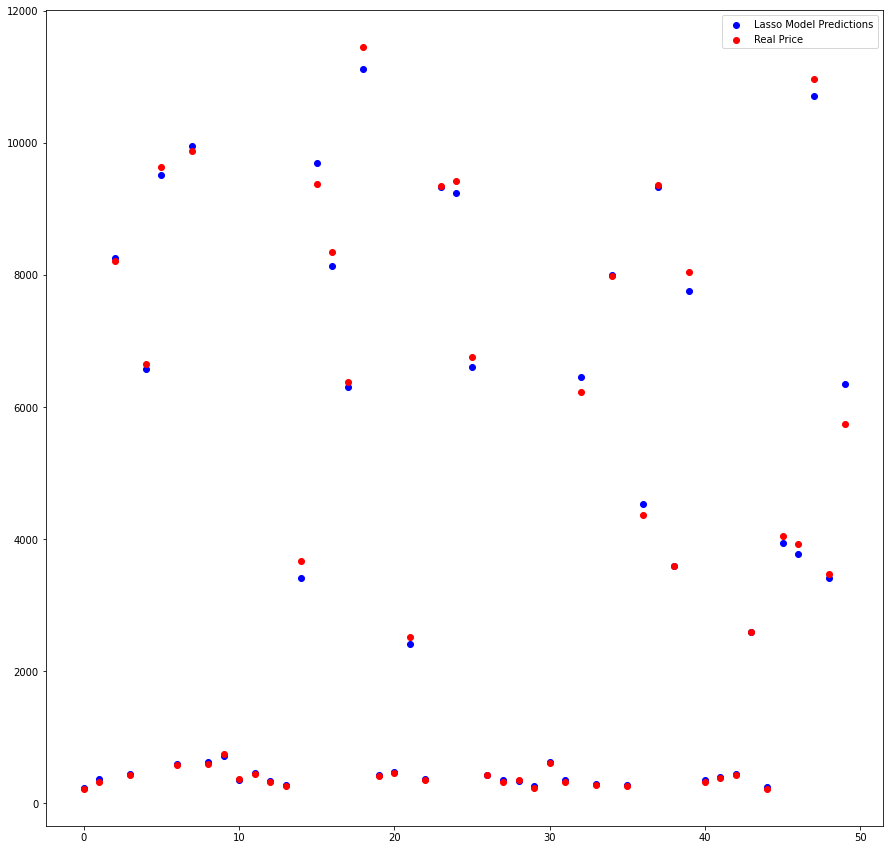

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(s_valid_y[:50])), x_pred[:50], c='b', label="Lasso Model Predictions")
ax1.scatter(range(len(s_valid_y[:50])), s_valid_y[:50], c='r', label="Real Price")
plt.legend(loc='upper right')

# SVR TUNING

0.9766443395075648


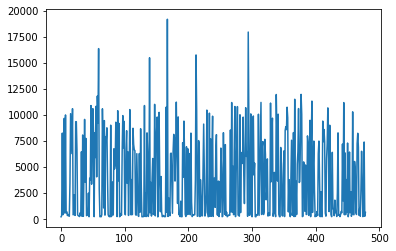

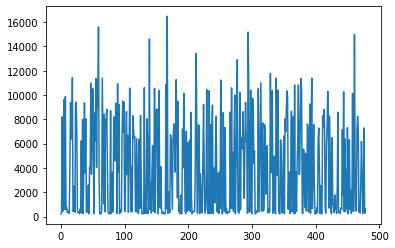

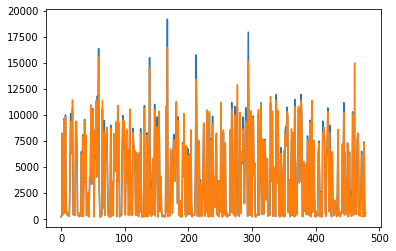

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler


svReg = SVR(C = 100000, epsilon = 0.5)
#C represents tradeoff in minimizing the correctness of the classifier and allowing support vectors
# epsilon is our error tolerance
svReg.fit(s_train_x,s_train_y)
x_pred = svReg.predict(s_valid_x)
print(svReg.score(s_valid_x,s_valid_y))

plt.plot(range(len(s_valid_y)),x_pred)
plt.figure()
plt.plot(range(len(s_valid_y)),s_valid_y)
plt.figure()
plt.plot(range(len(s_valid_y)),x_pred)
plt.plot(range(len(s_valid_y)),s_valid_y)

In [ ]:
SVR_tuned_params = [{'C': np.linspace(1, 1000000, 100), 'epsilon': np.linspace(0, 1, 10)}]

In [ ]:
SVR_search = GridSearchCV(svReg, param_grid=SVR_tuned_params, scoring=['r2'],refit='r2',n_jobs=10)

In [ ]:
train_x

array([[8.04408057e-02, 1.15452454e-04, 1.81854920e-01, 6.90757561e-02,
        2.58704852e-02, 3.70655834e-02],
       [9.47533289e-02, 9.35003241e-02, 1.42857143e-01, 6.71372048e-02,
        4.44518169e-02, 4.62772085e-02],
       [8.11041330e-02, 5.98597881e-02, 1.22448980e-01, 1.04193883e-01,
        4.33656962e-02, 3.33621883e-02],
       ...,
       [8.26540417e-02, 7.29705688e-02, 1.42857143e-01, 2.02179538e-01,
        6.71451534e-02, 1.41590500e-02],
       [8.23540593e-02, 4.22740704e-02, 1.22448980e-01, 1.74521000e-01,
        6.33703863e-02, 1.80807384e-02],
       [6.66049871e-02, 3.79561486e-02, 1.42857143e-01, 1.76559856e-01,
        7.95380076e-02, 1.50180713e-02]])

In [ ]:
SVR_search.fit(s_train_x, s_train_y)

KeyboardInterrupt: ignored

In [ ]:
SVR_search.best_estimator_

0.9766434313513367


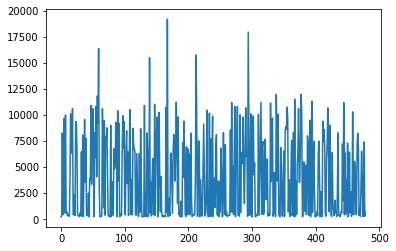

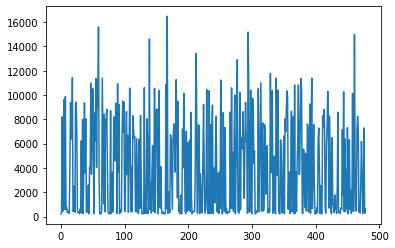

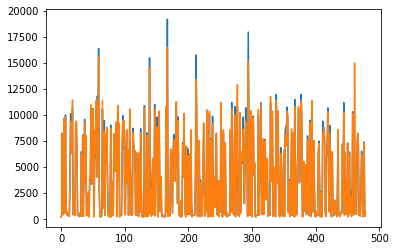

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_data = scaler.fit_transform(df, BTC_data['Close'])
scaler.fit_transform(df, BTC_data['Close'])
train_x, valid_x, train_y, valid_y = train_test_split(scale_data, BTC_data['Close'], test_size = 0.2)

svReg = SVR(C = 100012.32, epsilon = 0.457)
#C represents tradeoff in minimizing the correctness of the classifier and allowing support vectors
# epsilon is our error tolerance
svReg.fit(s_train_x,s_train_y)
x_pred = svReg.predict(s_valid_x)
print(svReg.score(s_valid_x,s_valid_y))

plt.plot(range(len(s_valid_y)),x_pred)
plt.figure()
plt.plot(range(len(s_valid_y)),s_valid_y)
plt.figure()
plt.plot(range(len(s_valid_y)),x_pred)
plt.plot(range(len(s_valid_y)),s_valid_y)

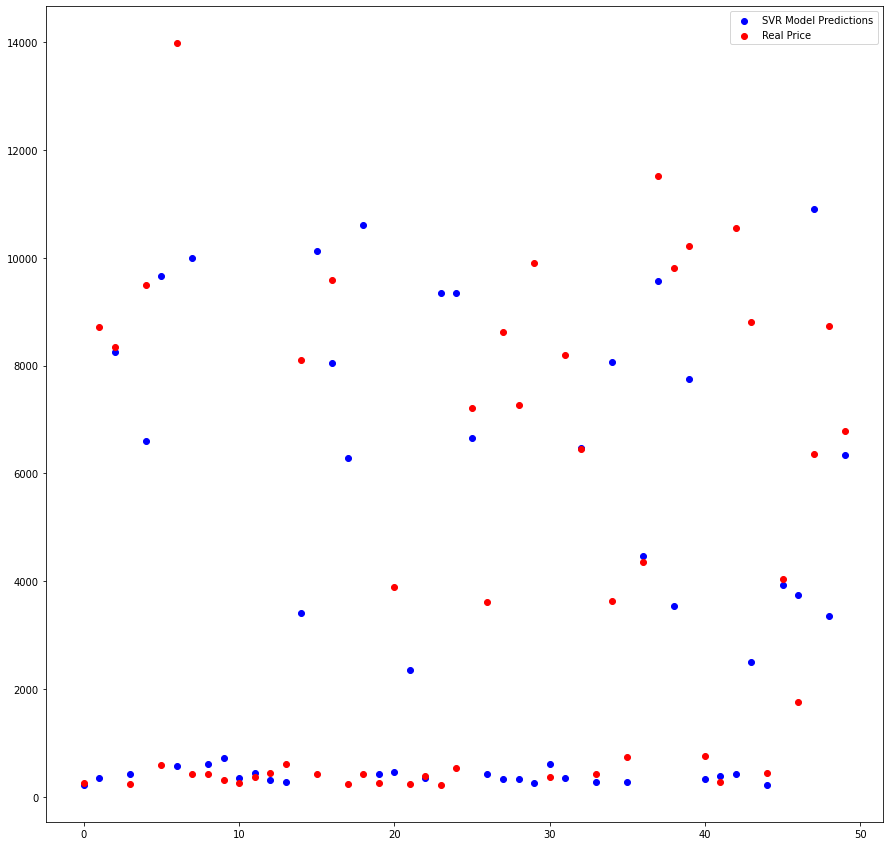

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(valid_y[:50])), x_pred[:50], c='b', label="SVR Model Predictions")
ax1.scatter(range(len(valid_y[:50])), valid_y[:50], c='r', label="Real Price")
plt.legend(loc='upper right')